In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [ ]:
df.duplicated().sum()           #int()             df.drop_duplicates(inplace=True)   in case duplicates

np.int64(0)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
round(df.isna().mean() * 100 ,2)

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


In [ ]:
df.dropna(subset=['Embarked'],inplace=True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

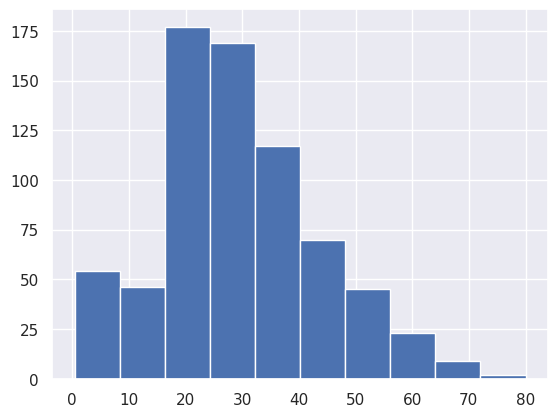

In [ ]:
df.Age.hist()

In [ ]:
##df.Age.fillna(df.Age.median(), inplace=True)  مش احسن طريقه

In [ ]:
df[df['Sex'] == 'female'].Age.median()

27.0

In [ ]:
df[df['Sex'] == 'male'].Age.median()

29.0

In [ ]:
print(df[df['Pclass'] == 1].Age.median())
print(df[df['Pclass'] == 2].Age.median())
print(df[df['Pclass'] == 3].Age.median())

37.0
29.0
24.0


In [ ]:
print(df[(df['Pclass'] == 1) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 1) & (df['Sex'] == 'male')].Age.median())
print(df[(df['Pclass'] == 2) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 2) & (df['Sex'] == 'male')].Age.median())
print(df[(df['Pclass'] == 3) & (df['Sex'] == 'female')].Age.median())
print(df[(df['Pclass'] == 3) & (df['Sex'] == 'male')].Age.median())

35.0
40.0
28.0
30.0
21.5
25.0


In [ ]:
df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [ ]:
# filling missing values of age based on Pclass and Sex
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))              #transform instead of apply

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1 ,inplace=True )


In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.columns=df.columns.str.lower()
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
796,1,1,female,49.0,0,0,25.9292,S


#univariate

In [ ]:
df.survived.value_counts()

,count
survived,
0,549
1,340


In [ ]:
df.survived.value_counts()/len(df)

,count
survived,
0,0.617548
1,0.382452


In [ ]:
df.survived.value_counts(normalize=True)

,proportion
survived,
0,0.617548
1,0.382452


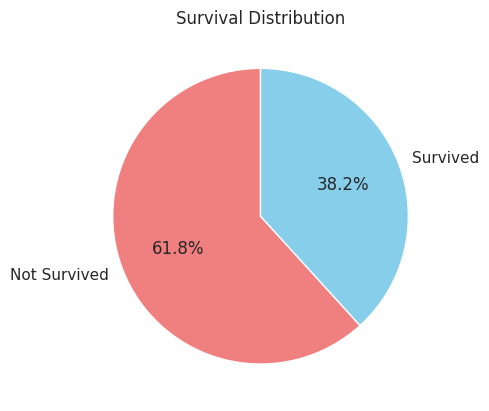

In [ ]:

counts = df.survived.value_counts()
labels = ['Not Survived', 'Survived']
colors = ['lightcoral', 'skyblue']

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Survival Distribution')
plt.show()

#survived----------------------------------------------------------> about 38%

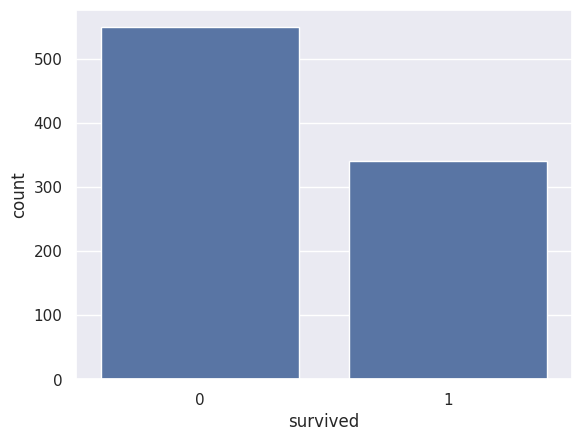

In [ ]:
sns.countplot(x='survived',data=df);

<Axes: xlabel='survived', ylabel='count'>

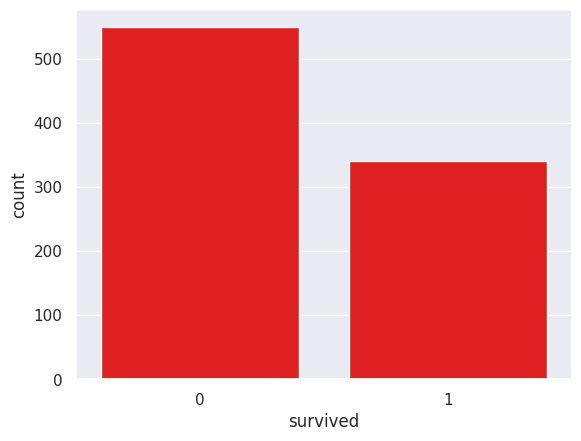

In [ ]:
sns.countplot(x='survived', data=df, color='red')


<ipython-input-96-c7a0e4e48b2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set1')  # أو Set2, Set3


<Axes: xlabel='survived', ylabel='count'>

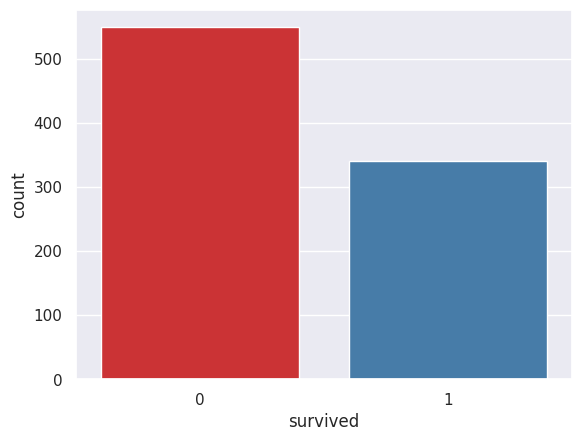

In [ ]:
sns.countplot(x='survived', data=df, palette='Set1')  # أو Set2, Set3


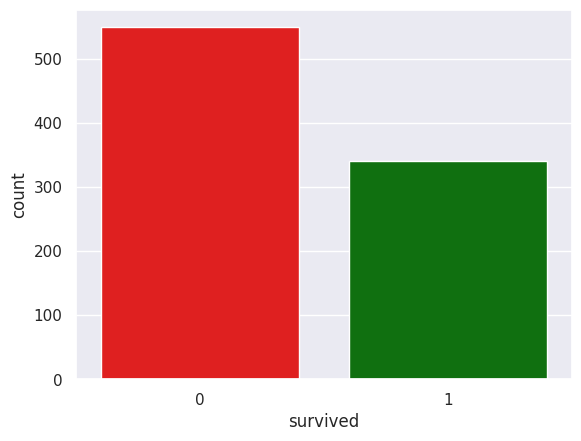

In [ ]:
#sns.countplot(x='survived', hue='survived', data=df, palette={'0': 'red', '1': 'green'}, legend=False)          # float
sns.countplot(x='survived', hue='survived', data=df, palette={0: 'red', 1: 'green'}, legend=False);              #  int


#pclass

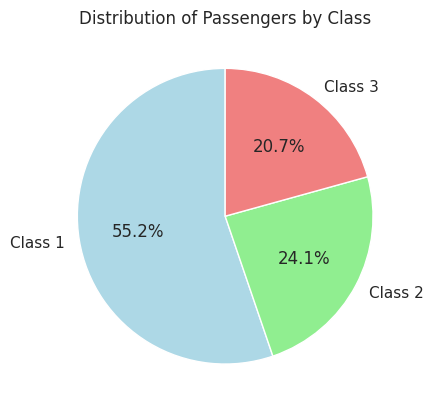

In [ ]:
counts = df.pclass.value_counts()
counts.plot.pie(autopct='%1.1f%%', labels=['Class 1', 'Class 2', 'Class 3'], startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])

plt.title('Distribution of Passengers by Class')
plt.ylabel('')
plt.show()


In [ ]:
df.pclass.value_counts(normalize=True)


,proportion
pclass,
3,0.552306
1,0.240720
2,0.206974


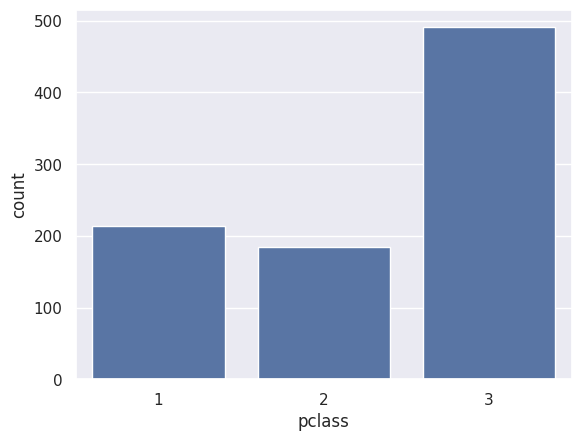

In [ ]:
sns.countplot(x='pclass',data=df);

#sibsp

In [ ]:
df.sibsp.value_counts(normalize=True)

,proportion
sibsp,
0,0.681665
1,0.235096
2,0.031496
4,0.020247
3,0.017998
8,0.007874
5,0.005624


<Axes: xlabel='sibsp', ylabel='count'>

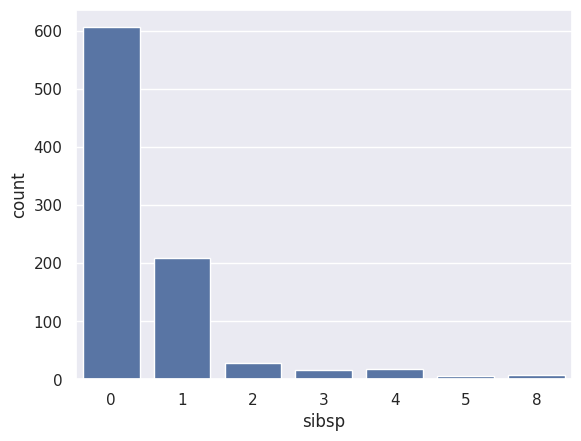

In [ ]:
sns.countplot(x='sibsp',data=df)

In [ ]:
df.parch.value_counts(normalize=True)


,proportion
parch,
0,0.760405
1,0.132733
2,0.089989
5,0.005624
3,0.005624
4,0.004499
6,0.001125


<Axes: xlabel='parch', ylabel='count'>

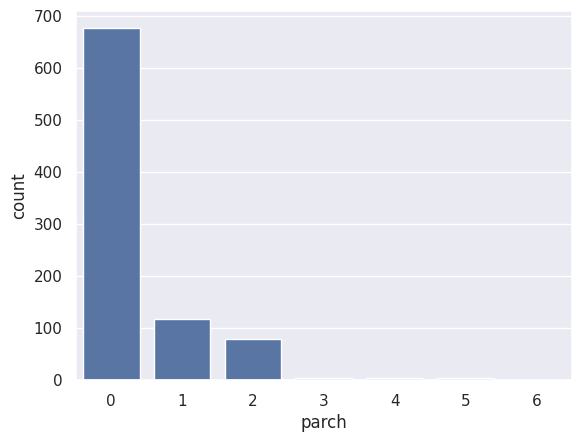

In [ ]:
sns.countplot(x='parch',data=df)

In [ ]:
def explorecategorical(df,col):
  print(f'-------{col}---------')
  print(df.columns.value_counts(normalize=True))
  sns.countplot(x=col,data=df)
  plt.show()

-------pclass---------
survived    0.125
pclass      0.125
sex         0.125
age         0.125
sibsp       0.125
parch       0.125
fare        0.125
embarked    0.125
Name: proportion, dtype: float64


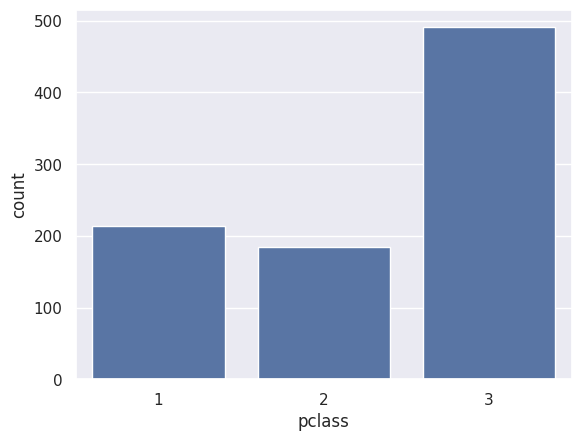

-------sibsp---------
survived    0.125
pclass      0.125
sex         0.125
age         0.125
sibsp       0.125
parch       0.125
fare        0.125
embarked    0.125
Name: proportion, dtype: float64


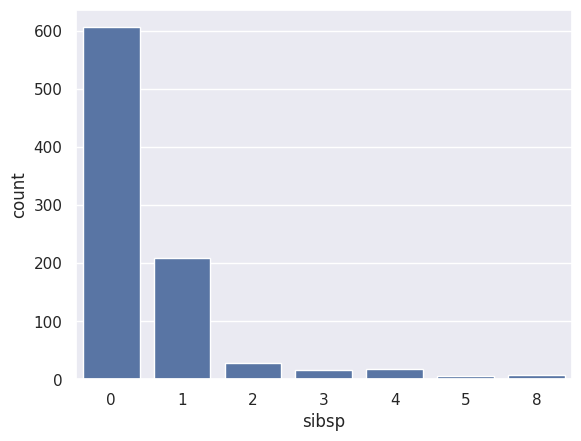

-------embarked---------
survived    0.125
pclass      0.125
sex         0.125
age         0.125
sibsp       0.125
parch       0.125
fare        0.125
embarked    0.125
Name: proportion, dtype: float64


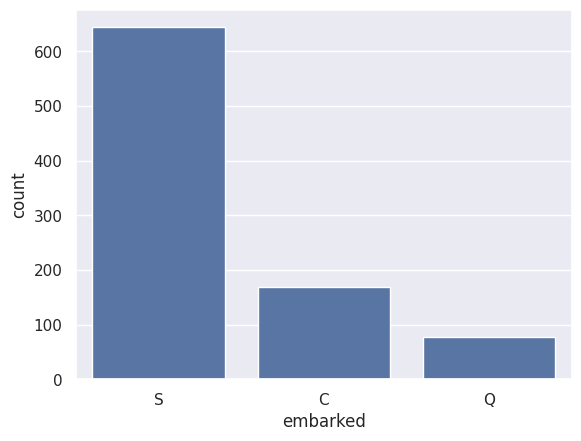

-------parch---------
survived    0.125
pclass      0.125
sex         0.125
age         0.125
sibsp       0.125
parch       0.125
fare        0.125
embarked    0.125
Name: proportion, dtype: float64


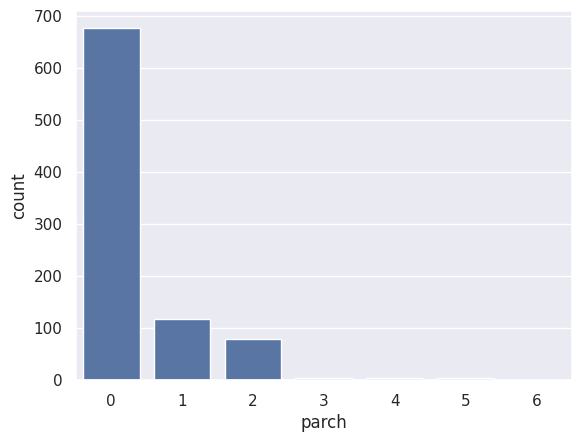

-------sex---------
survived    0.125
pclass      0.125
sex         0.125
age         0.125
sibsp       0.125
parch       0.125
fare        0.125
embarked    0.125
Name: proportion, dtype: float64


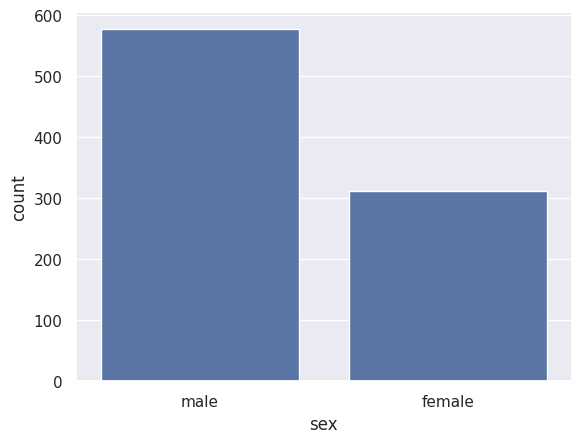

In [ ]:
for col in ['pclass','sibsp','embarked','parch','sex']:
  explorecategorical(df,col)

In [ ]:
"""def survival_rate(df,col):
  print(df.groupby(col).survived.mean())
  sns.barplot(x=col,y='survived',data=df,ci=None)
  plt.axhline(df.survived.mean(),color='black',linestyle='--')
  plt.show()"""

"def survival_rate(df,col):\n  print(df.groupby(col).survived.mean())\n  sns.barplot(x=col,y='survived',data=df,ci=None)\n  plt.axhline(df.survived.mean(),color='black',linestyle='--')\n  plt.show()"

In [ ]:
"""for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:
  survival_rate(df, col)"""

"for col in ['pclass', 'sibsp', 'parch', 'embarked', 'sex']:\n  survival_rate(df, col)"

#start 2

In [ ]:
df.sample()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
133,1,2,female,29.0,1,0,26.0,S


In [ ]:
df.groupby('pclass')['survived'].mean()

,survived
pclass,
1,0.626168
2,0.472826
3,0.242363


<ipython-input-46-1883823d979a>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass',y='survived',data=df, ci=None) ;


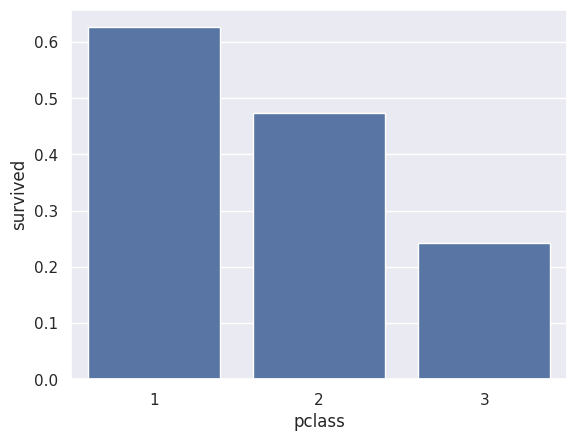

In [ ]:
sns.barplot(x='pclass',y='survived',data=df, ci=None) ;

# 1 The higher the class the higher the survived rate

<ipython-input-47-d23a5f5b89d4>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None , palette='Set2');
<ipython-input-47-d23a5f5b89d4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pclass', y='survived', data=df, ci=None , palette='Set2');


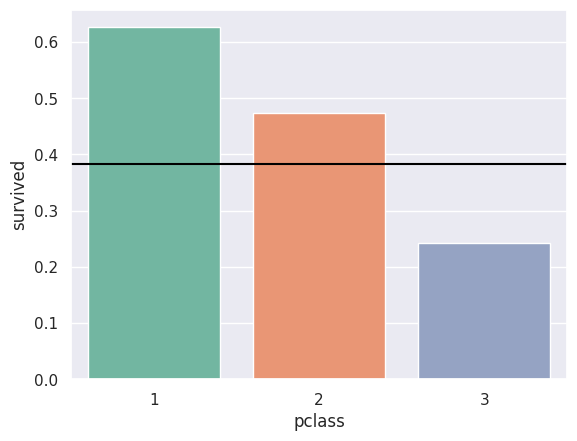

In [ ]:
sns.barplot(x='pclass', y='survived', data=df, ci=None , palette='Set2');
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='-');                    #survived was 38%
plt.show()

<ipython-input-48-c0129758f21c>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sibsp', y='survived', data=df, ci=None , palette='Set2');
<ipython-input-48-c0129758f21c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sibsp', y='survived', data=df, ci=None , palette='Set2');


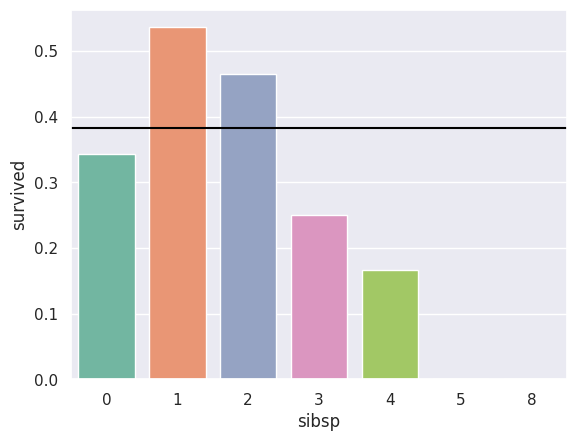

In [ ]:
sns.barplot(x='sibsp', y='survived', data=df, ci=None , palette='Set2');
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='-');                    #survived was 38%
plt.show()

<ipython-input-49-ac2161e3adae>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='parch', y='survived', data=df, ci=None , palette='Set2');
<ipython-input-49-ac2161e3adae>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parch', y='survived', data=df, ci=None , palette='Set2');


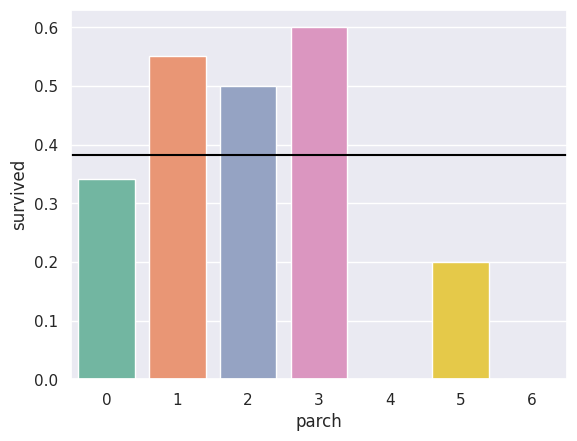

In [ ]:
sns.barplot(x='parch', y='survived', data=df, ci=None , palette='Set2');
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='-');                    #survived was 38%
plt.show()

<ipython-input-50-2c68b19a7e5d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', data=df, ci=None , palette='Set2');
<ipython-input-50-2c68b19a7e5d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='embarked', y='survived', data=df, ci=None , palette='Set2');


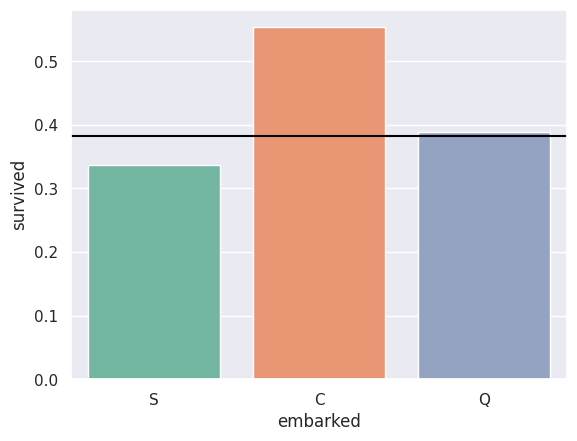

In [ ]:
sns.barplot(x='embarked', y='survived', data=df, ci=None , palette='Set2');
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='-');                    #survived was 38%
plt.show()

<ipython-input-51-408dda41f4c0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None , palette='Set2');
<ipython-input-51-408dda41f4c0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=df, ci=None , palette='Set2');


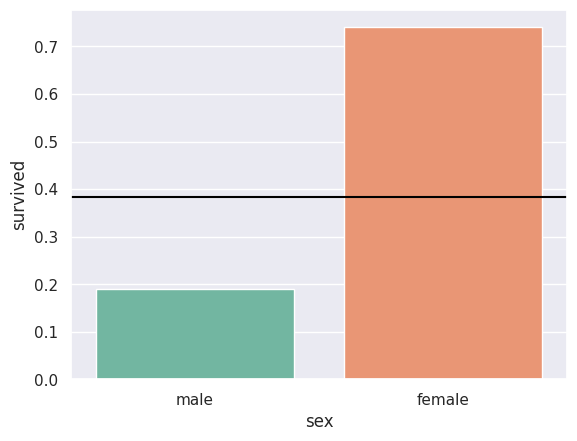

In [ ]:
sns.barplot(x='sex', y='survived', data=df, ci=None , palette='Set2');
# plot horizontal line for mean
plt.axhline(df.survived.mean(), color='black', linestyle='-');                    #survived was 38%
plt.show()

#Females had a higher survival rate

#Outliers

In [ ]:
df.describe()['age']

,age
count,889.000000
mean,29.065433
std,13.270162
min,0.420000
25%,21.500000
50%,26.000000
75%,36.000000
max,80.000000


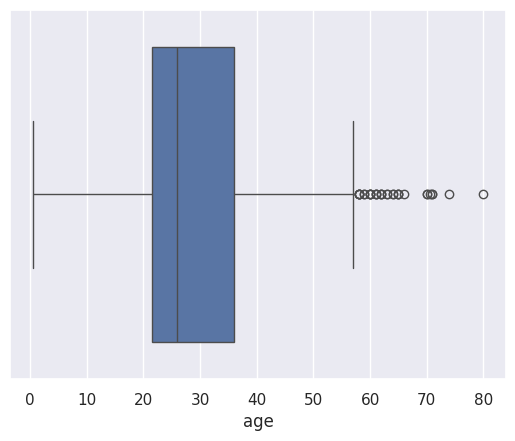

In [ ]:

sns.boxplot( x='age', data=df);

In [ ]:
df.fare.describe()

,fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


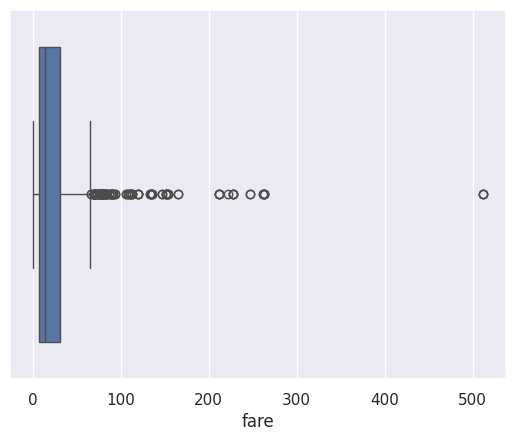

In [ ]:
sns.boxplot( x='fare', data=df);

In [ ]:
# Remove outliers
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] > lower_bound) & (df[col] < upper_bound)]

In [ ]:
df = df[df.fare < 300]
# df = remove_outliers(df, 'fare')

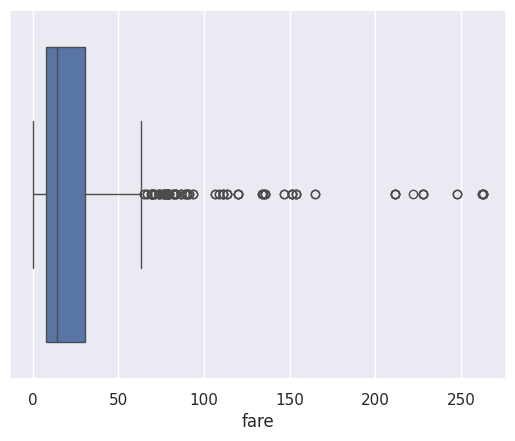

In [ ]:
sns.boxplot( x='fare', data=df);

In [ ]:
# Split Fare into groups
df['fare_group'] = pd.cut(df.fare, bins=[-0.99, 8, 15, 35, 265], labels=['low', 'medium', 'high', 'very high']);

<ipython-input-60-b376337af955>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='fare_group', y='survived', data=df, ci=None , palette='Set2');
<ipython-input-60-b376337af955>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='fare_group', y='survived', data=df, ci=None , palette='Set2');


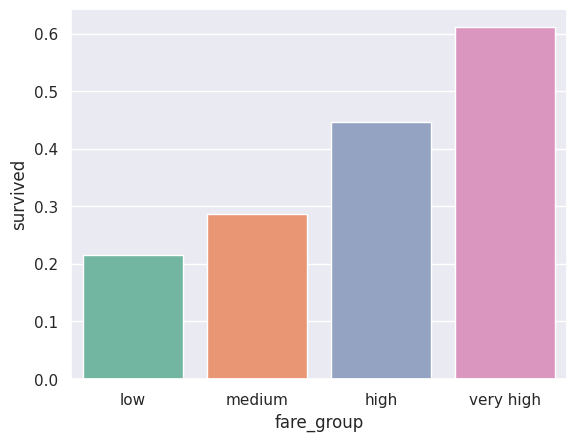

In [ ]:
sns.barplot(x='fare_group', y='survived', data=df, ci=None , palette='Set2');


<ipython-input-61-4365eaa1cdb0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);


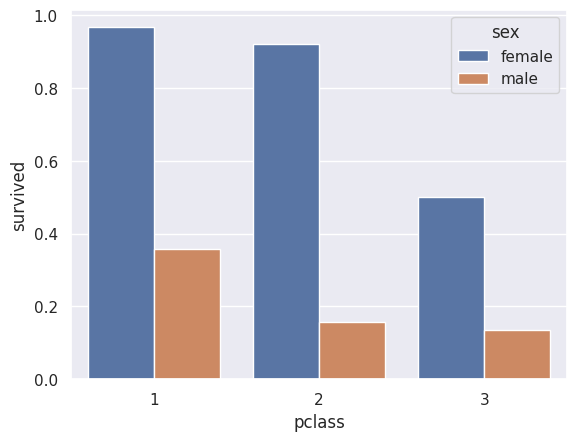

In [ ]:
sns.barplot(x='pclass', y='survived', hue= 'sex', data=df, ci=None);

<ipython-input-62-6591ae4b579b>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);


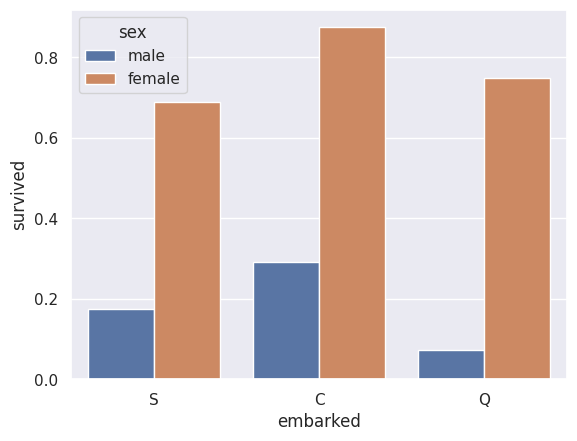

In [ ]:
sns.barplot(x='embarked', y='survived', hue= 'sex', data=df, ci=None);

In [ ]:
df.corr(numeric_only=True)


,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.331075,-0.066652,-0.032095,0.083691,0.259188
pclass,-0.331075,1.000000,-0.410056,0.079490,0.016579,-0.603362
age,-0.066652,-0.410056,1.000000,-0.248590,-0.174682,0.126314
sibsp,-0.032095,0.079490,-0.248590,1.000000,0.414844,0.213507
parch,0.083691,0.016579,-0.174682,0.414844,1.000000,0.265692
fare,0.259188,-0.603362,0.126314,0.213507,0.265692,1.000000


In [ ]:
df.select_dtypes(include='number').corr()['survived']


,survived
survived,1.000000
pclass,-0.331075
age,-0.066652
sibsp,-0.032095
parch,0.083691
fare,0.259188


In [ ]:
df.select_dtypes(include='number').corr()['survived'].sort_values(ascending=False)


,survived
survived,1.000000
fare,0.259188
parch,0.083691
sibsp,-0.032095
age,-0.066652
pclass,-0.331075


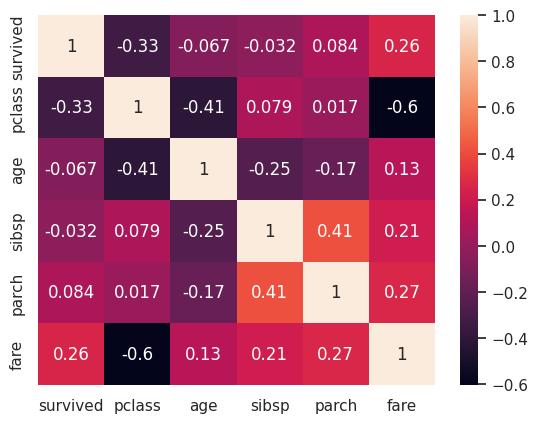

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True);